In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("mako", as_cmap=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [5]:
df.dropna(inplace=True)

In [6]:
print('total number of entries: ', df.shape[0])
print('total number of columns: ', df.shape[1])

total number of entries:  10127
total number of columns:  23


In [7]:
df.drop(axis=1, columns=[df.columns[-1], df.columns[-2]], inplace=True)

In [8]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

/home/zhivar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

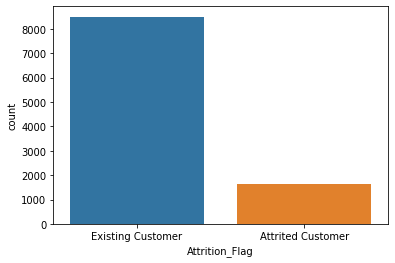

In [9]:
sns.countplot(df.Attrition_Flag)

In [10]:
df_categorials = df.select_dtypes(include=['object'])
df_rest = df.select_dtypes(exclude=['object'])

In [11]:
df_categorials.head(3)

Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue

In [12]:
df_rest.head(3)

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0  768805383            45                3              39   
1  818770008            49                5              44   
2  713982108            51                3              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000

In [13]:
df_categorials.describe()

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [14]:
df_attrited = df[df.Attrition_Flag == 'Attrited Customer']

In [15]:
def plot_count_plot_categorical(ax, column):
    sns.countplot(
        ax=ax,
        x=df_categorials[column], 
        hue=df_categorials.Attrition_Flag,
        order=df_categorials.iloc[df_attrited.index][column].value_counts().index, 
                 )

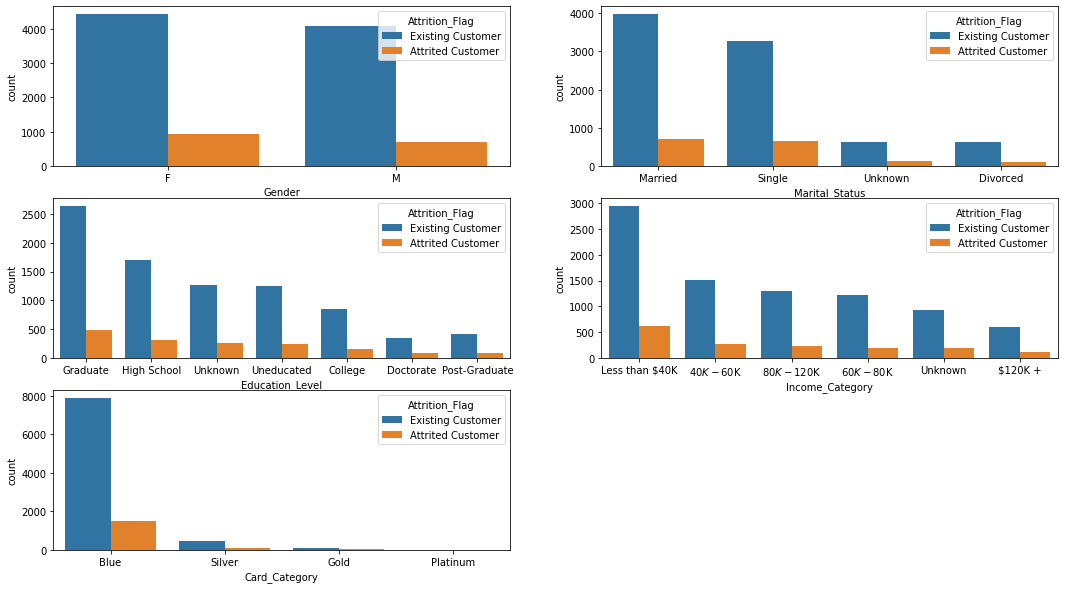

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
plot_count_plot_categorical(axes[0, 0], 'Gender')
plot_count_plot_categorical(axes[0, 1], 'Marital_Status')
plot_count_plot_categorical(axes[1, 0], 'Education_Level')
plot_count_plot_categorical(axes[1, 1], 'Income_Category')
plot_count_plot_categorical(axes[2, 0], 'Card_Category')
fig.delaxes(axes[2][1])

<AxesSubplot:>

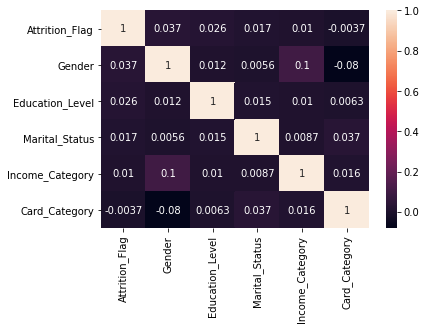

In [17]:
sns.heatmap(
    df_categorials.apply(lambda x: pd.factorize(x)[0]).corr(), 
    annot = True
)

In [18]:
df_rest.drop(columns=['CLIENTNUM'], axis=1, inplace=True)

/home/zhivar/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df_rest.head(3)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000

<AxesSubplot:>

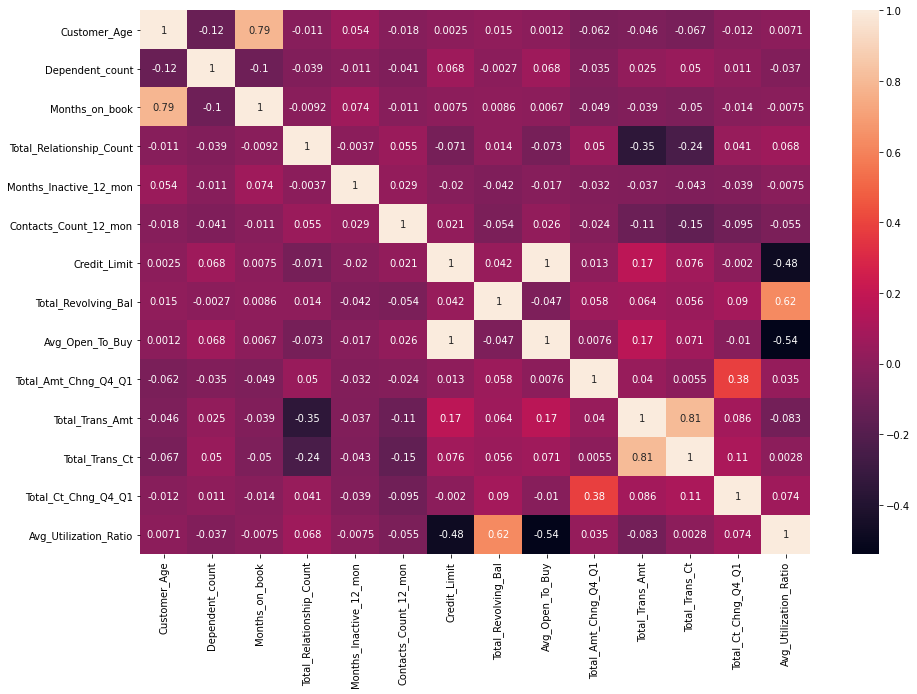

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    df_rest.corr(), 
    annot = True
)

removing outliers

In [21]:
df_rest = df_rest[(np.abs(stats.zscore(df_rest)) < 3).all(axis=1)]

In [22]:
df_categorials = df_categorials.iloc[df_rest.index]

In [23]:
df_categorials.reset_index(inplace=True)
df_rest.reset_index(inplace=True)

In [24]:
df_rest.drop('index', axis=1, inplace=True)
df_categorials.drop('index', axis=1, inplace=True)

In [25]:
df_categorials.head(3)

Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M        Graduate        Married     $40K - $60K   
1  Existing Customer      M      Uneducated        Unknown         $120K +   
2  Existing Customer      F        Graduate        Married  Less than $40K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue

In [26]:
df_rest.head(3)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            44                2              36                         3   
1            42                5              31                         5   
2            57                2              48                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      2        4010.0   
1                       3                      2        6748.0   
2                       2                      2        2436.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                 1247           2763.0                 1.376   
1                 1467           5281.0                 0.831   
2                  680           1756.0                 1.190   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1088              24                0.846                  0.311  
1             1201              42                0.680                  0.217  
2             1570              29                0.611                  0.279

In [27]:
correlation_matrix = df_rest.corr()

In [28]:
correlation_matrix

Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.125106        0.786646   
Dependent_count              -0.125106         1.000000       -0.106429   
Months_on_book                0.786646        -0.106429        1.000000   
Total_Relationship_Count     -0.021903        -0.043183       -0.018770   
Months_Inactive_12_mon        0.043922        -0.003941        0.063462   
Contacts_Count_12_mon        -0.017182        -0.044822       -0.010380   
Credit_Limit                  0.003760         0.067312        0.005537   
Total_Revolving_Bal           0.015137        -0.004509        0.007899   
Avg_Open_To_Buy               0.002381         0.067676        0.004815   
Total_Amt_Chng_Q4_Q1         -0.082895        -0.030650       -0.059059   
Total_Trans_Amt              -0.027932         0.041600       -0.016499   
Total_Trans_Ct               -0.051658         0.059783       -0.035171   
Total_Ct_Chng_Q4_Q1          -0.030621         0.016011       -0.021248   
Avg_Utilization_Ratio         0.004998        -0.037019       -0.008177   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.021903                0.043922   
Dependent_count                          -0.043183               -0.003941   
Months_on_book                           -0.018770                0.063462   
Total_Relationship_Count                  1.000000               -0.008907   
Months_Inactive_12_mon                   -0.008907                1.000000   
Contacts_Count_12_mon                     0.057025                0.028568   
Credit_Limit                             -0.058285               -0.019109   
Total_Revolving_Bal                       0.022925               -0.043860   
Avg_Open_To_Buy                          -0.060329               -0.015109   
Total_Amt_Chng_Q4_Q1                      0.047542               -0.021119   
Total_Trans_Amt                          -0.343384               -0.039607   
Total_Trans_Ct                           -0.205779               -0.051994   
Total_Ct_Chng_Q4_Q1                       0.041809               -0.041453   
Avg_Utilization_Ratio                     0.060879               -0.010003   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                          -0.017182      0.003760   
Dependent_count                       -0.044822      0.067312   
Months_on_book                        -0.010380      0.005537   
Total_Relationship_Count               0.057025     -0.058285   
Months_Inactive_12_mon                 0.028568     -0.019109   
Contacts_Count_12_mon                  1.000000      0.023184   
Credit_Limit                           0.023184      1.000000   
Total_Revolving_Bal                   -0.046345      0.038088   
Avg_Open_To_Buy                        0.027382      0.995866   
Total_Amt_Chng_Q4_Q1                  -0.023221      0.014687   
Total_Trans_Amt                       -0.137631      0.133174   
Total_Trans_Ct                        -0.162894      0.033093   
Total_Ct_Chng_Q4_Q1                   -0.101452     -0.017529   
Avg_Utilization_Ratio                 -0.053466     -0.478218   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                         0.015137         0.002381   
Dependent_count                     -0.004509         0.067676   
Months_on_book                       0.007899         0.004815   
Total_Relationship_Count             0.022925        -0.060329   
Months_Inactive_12_mon              -0.043860        -0.015109   
Contacts_Count_12_mon               -0.046345         0.027382   
Credit_Limit                         0.038088         0.995866   
Total_Revolving_Bal                  1.000000        -0.052840   
Avg_Open_To_Buy                     -0.052840         1.000000   
Total_Amt_Chng_Q4_Q1                 0.037095         0.011305   
Total_Trans_Amt            

In [29]:
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            correlated_features.add(correlation_matrix.columns[i])

In [30]:
correlated_features

{'Avg_Open_To_Buy',
 'Avg_Utilization_Ratio',
 'Months_on_book',
 'Total_Trans_Ct'}

In [31]:
obj_data = pd.get_dummies(df_categorials.drop('Attrition_Flag', axis=1), drop_first=True)

In [32]:
obj_data

Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
0            1                          0                         1   
1            1                          0                         0   
2            0                          0                         1   
3            0                          0                         1   
4            1                          1                         0   
...        ...                        ...                       ...   
9308         0                          0                         0   
9309         1                          0                         0   
9310         0                          0                         0   
9311         1                          0                         1   
9312         0                          0                         1   

      Education_Level_High School  Education_Level_Post-Graduate  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
9308                            0                              0   
9309                            0                              0   
9310                            1                              0   
9311                            0                              0   
9312                            0                              0   

      Education_Level_Uneducated  Education_Level_Unknown  \
0                              0                        0   
1                              1                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
9308                           1                        0   
9309                           0                        1   
9310                           0                        0   
9311                           0                        0   
9312                           0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                          1                      0                       0   
1                          0                      0                       1   
2                          1                      0                       0   
3                          1                      0                       0   
4                          0                      0                       0   
...                      ...                    ...                     ...   
9308                       0                      1                       0   
9309                       0                      0                       0   
9310                       1                      0                       0   
9311                       0                      0                       1   
9312                       1                      0                       0   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                               1                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            1   
...                           ...                          ...   
9308                            0                            0   
9309                            1                            0   
9310                            0                           

In [36]:
all_data = pd.concat([obj_data, df_rest], axis=1)
all_data.head(3)

Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
0         1                          0                         1   
1         1                          0                         0   
2         0                          0                         1   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            0                              0   
1                            0                              0   
2                            0                              0   

   Education_Level_Uneducated  Education_Level_Unknown  \
0                           0                        0   
1                           1                        0   
2                           0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  ...  \
0                       1                      0                       0  ...   
1                       0                      0                       1  ...   
2                       1                      0                       0  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      2        4010.0   
1                       3                      2        6748.0   
2                       2                      2        2436.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                 1247           2763.0                 1.376   
1                 1467           5281.0                 0.831   
2                  680           1756.0                 1.190   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1088              24                0.846                  0.311  
1             1201              42                0.680                  0.217  
2             1570              29                0.611                  0.279  

[3 rows x 32 columns]

In [37]:
Y = pd.get_dummies(df_categorials.Attrition_Flag, drop_first=True)
X = all_data

In [38]:
X.shape, Y.shape

((9313, 32), (9313, 1))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=43)

In [40]:
smk = SMOTETomek(random_state=43)
X_train, y_train = smk.fit_sample(X_train, y_train)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11290, 32), (2329, 32), (11290, 1), (2329, 1))

In [50]:
classifier = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=50))

In [51]:
# classifier=RandomForestClassifier(random_state=50)

In [52]:
classifier.fit(X_train, y_train)

/home/zhivar/.local/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=50))])

accuracy:  0.9501932159725204
f1:  0.9702564102564103


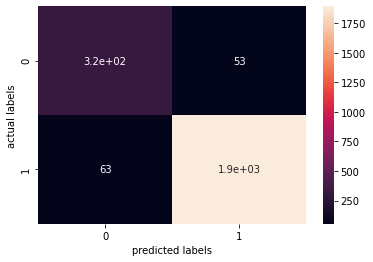

In [57]:
prediction=classifier.predict(X_test)
print('accuracy: ', accuracy_score(y_test, prediction))
print('f1: ', f1_score(y_test, prediction))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)
plt.ylabel('actual labels')
plt.xlabel('predicted labels')
plt.show()

In [59]:
pd.DataFrame(
    classifier.named_steps['randomforestclassifier'].feature_importances_, 
    index = X_train.columns, 
    columns=['importance']
).sort_values('importance', ascending=False).head(10)

importance
Total_Trans_Ct              0.204635
Total_Trans_Amt             0.200886
Total_Revolving_Bal         0.104319
Total_Ct_Chng_Q4_Q1         0.073984
Avg_Utilization_Ratio       0.063487
Total_Relationship_Count    0.052142
Total_Amt_Chng_Q4_Q1        0.042840
Avg_Open_To_Buy             0.030878
Credit_Limit                0.027741
Customer_Age                0.024107